Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB
None

Missing Values Before Handling:
 DATE          0
IPG2211A2N    0
dtype: int64

Data Info After Processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB
None


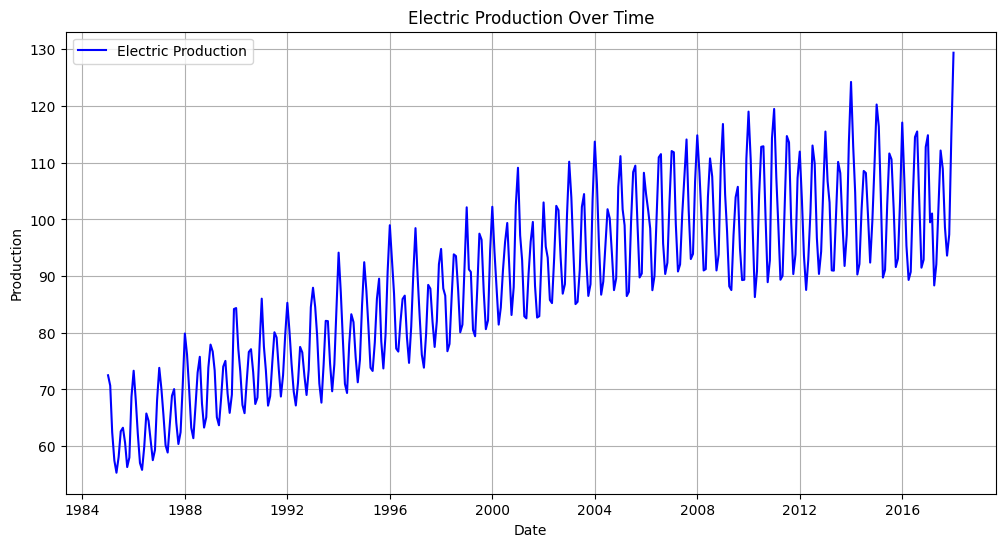

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\Lenovo\\Downloads\\Electric_Production.csv"
df = pd.read_csv(file_path)

# Display basic information
print("Initial Data Info:")
print(df.info())

# Check for missing values
print("\nMissing Values Before Handling:\n", df.isnull().sum())

# Remove rows with null values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Convert date column to datetime (assuming first column is date)
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], errors='coerce')

# Drop any rows where the date conversion failed
df = df.dropna(subset=[df.columns[0]])

# Sort by date
df = df.sort_values(by=df.columns[0])

# Reset index
df = df.reset_index(drop=True)

# Check data after preprocessing
print("\nData Info After Processing:")
print(df.info())

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(df[df.columns[0]], df[df.columns[1]], label='Electric Production', color='b')
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Electric Production Over Time')
plt.legend()
plt.grid(True)
plt.show()
